# HEMANG MALIK (220968092)
#### Lab4 : Cereals

In [1]:
import pandas as pd
import matplotlib as mtp
import seaborn as sns

df=pd.read_excel("Cereals1.xls")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [2]:
df=df.mask(df==-1).fillna(df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].mean())


In [3]:
# Cross tabulate the type of cereal (hot vs cold) against the manufacturer
pd.crosstab(df['type'],df['mfr'])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [4]:
# Which is the cereal with the best rating, worst rating?
print("the cereal with the best rating is ")
print(df['name'][df['rating'].argmax()])
print("the cereal with the worst rating is ")
print(df['name'][df['rating'].argmin()])

the cereal with the best rating is 
All-Bran_with_Extra_Fiber
the cereal with the worst rating is 
Cap'n'Crunch


<AxesSubplot:xlabel='type', ylabel='rating'>

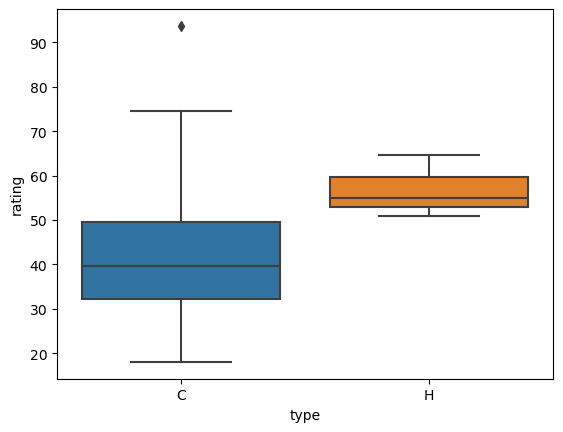

In [5]:
# Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals
sns.boxplot(y=df['rating'], x=df['type'])


In [6]:
# Is there a relation between sugars, calories, carbs, and fat?
print(df[['sugars','calories','carbo','fat']].corr())
print("Sugar and calories have moderate degree of positive linear correlation")
print("Sugar and carbs have moderate degree of negative linear correlation")
print("Suagr and fat have weak degree of positive linear correlation")
print("Calories and carbs have weak degree of positive linear correlation")
print("Calories and fat have moderate degree of positive linear correlation")
print("Carbs and fat have weak degree of negative linear correlation")

            sugars  calories     carbo       fat
sugars    1.000000  0.574304 -0.501056  0.300349
calories  0.574304  1.000000  0.207615  0.510630
carbo    -0.501056  0.207615  1.000000 -0.312341
fat       0.300349  0.510630 -0.312341  1.000000
Sugar and calories have moderate degree of positive linear correlation
Sugar and carbs have moderate degree of negative linear correlation
Suagr and fat have weak degree of positive linear correlation
Calories and carbs have weak degree of positive linear correlation
Calories and fat have moderate degree of positive linear correlation
Carbs and fat have weak degree of negative linear correlation


In [7]:
# Which manufacturers produce cereal with highest calories?
pd.crosstab(df['calories'],df['mfr'])

mfr,A,G,K,N,P,Q,R
calories,,,,,,,
50,0,0,1,0,0,2,0
70,0,0,1,0,0,0,0
80,0,0,0,1,0,0,0
90,0,0,2,3,1,0,1
100,1,5,3,1,2,3,2
110,0,13,10,0,3,0,3
120,0,1,3,0,3,3,0
130,0,2,0,0,0,0,0
140,0,1,2,0,0,0,0


-0.6743360496799723


<AxesSubplot:>

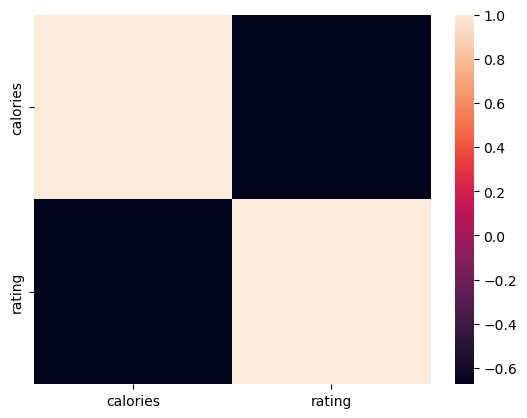

In [8]:
# Use correlation tests and visualization to identify if the two variables calories and
# consumer rating associated?
print(df['calories'].corr(df['rating']))
df2 = pd.read_excel('Cereals1.xls', usecols='D, P')
sns.heatmap(df2.corr())



In [9]:
#Anova
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['rating'], df['calories'])
print(fvalue, pvalue)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('rating ~ C(calories)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

576.8786819375374 2.88283004391097e-53


,sum_sq,df,F,PR(>F)
C(calories),9137.671726,10.0,11.448496,5.101726e-11
Residual,5188.005828,65.0,NaN,NaN


0.0019730207509652386
AxesSubplot(0.125,0.11;0.62x0.77)


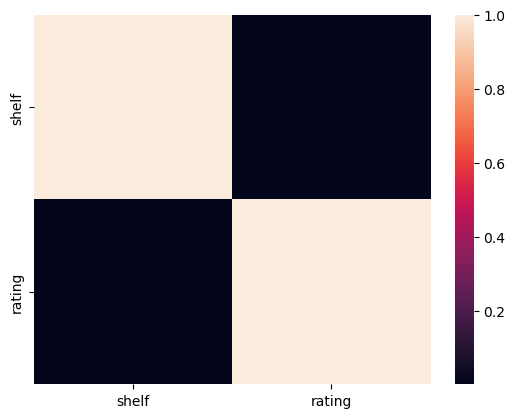

In [10]:
# Use correlation tests and visualization to identify if the two variables shelf and
# consumer rating associated? 
print(df['shelf'].corr(df['rating']))
df3 = pd.read_excel('Cereals1.xls', usecols='M, P')
print(sns.heatmap(df3.corr()))



In [11]:
#Anova
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['rating'], df['shelf'])
print(fvalue, pvalue)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('rating ~ C(shelf)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

638.4347192955644 6.423036106528478e-56


,sum_sq,df,F,PR(>F)
C(shelf),1601.525601,2.0,4.594073,0.013205
Residual,12724.151953,73.0,NaN,NaN


mfr        A  G  K  N  P  Q  R
rating                        
18.042851  0  0  0  0  0  1  0
19.823573  0  1  0  0  0  0  0
21.871292  0  0  0  0  0  1  0
22.396513  0  1  0  0  0  0  0
22.736446  0  1  0  0  0  0  0
...       .. .. .. .. .. .. ..
64.533816  0  0  0  1  0  0  0
68.235885  0  0  0  1  0  0  0
72.801787  0  0  0  1  0  0  0
74.472949  0  0  0  1  0  0  0
93.704912  0  0  1  0  0  0  0

[76 rows x 7 columns]


<AxesSubplot:xlabel='rating', ylabel='mfr'>

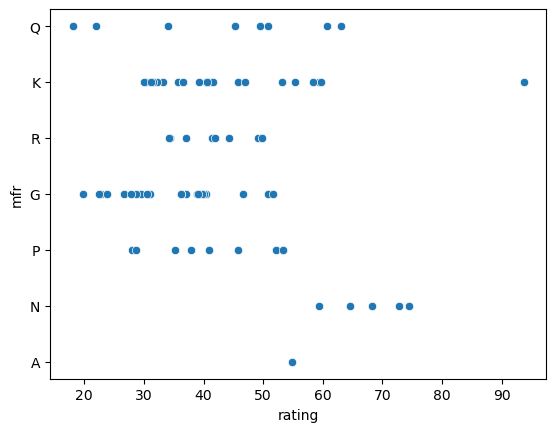

In [12]:
# Is there a relation between manufacturer and rating?
print(pd.crosstab(df['rating'],df['mfr']))
sns.scatterplot(x=df['rating'],y=df['mfr'])

In [14]:
# Which nutrients are essential for a good rating for a cereal
print(df.corr())
print ("Fiber, protein and potass")

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.054543  0.510630  0.299194 -0.233026  0.207615   
protein   0.054543  1.000000  0.211159 -0.049025  0.483619  0.021122   
fat       0.510630  0.211159  1.000000 -0.005473  0.018689 -0.312341   
sodium    0.299194 -0.049025 -0.005473  1.000000 -0.059662  0.291908   
fiber    -0.233026  0.483619  0.018689 -0.059662  1.000000 -0.304542   
carbo     0.207615  0.021122 -0.312341  0.291908 -0.304542  1.000000   
sugars    0.574304 -0.281793  0.300349  0.056912 -0.138907 -0.501056   
potass   -0.006339  0.547597  0.207964 -0.031008  0.901348 -0.298212   
vitamins  0.268211  0.010029 -0.031186  0.361143 -0.027967  0.221974   
shelf     0.125009  0.119134  0.265462 -0.065681  0.278218 -0.165663   
weight    0.708432  0.222332  0.214647  0.307985  0.276708  0.137884   
cups      0.035874 -0.216088 -0.181731  0.113210 -0.468694  0.318593   
rating   -0.674336  0.453683 -0.418439 -0.402077  0.557242  0.16

In [15]:
# Design a Linear regression model to predict the rating of a cereal based on top 3
# related nutrients. Tabulate the accuracy of the model using an 80, 20 split.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
x = df[['protein','fiber','potass']]
y = df['rating']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=80)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

print(reg.score(x_test, y_test))


0.8373145004514801
